In [1]:
import keras, os, pickle, re, sklearn, string, tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.layers import Embedding
from keras.optimizers import Adadelta, adam
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.vis_utils  import plot_model

print('Keras version: \t\t%s' % keras.__version__)
print('Scikit version: \t%s' % sklearn.__version__)
print('TensorFlow version: \t%s' % tensorflow.__version__)


Using TensorFlow backend.


Keras version: 		2.0.9
Scikit version: 	0.19.1
TensorFlow version: 	1.4.1


In [2]:
import nltk
from nltk.corpus import stopwords
from tika import parser
from sklearn.metrics import classification_report



In [3]:
def LoadData_admin():
    label_admin=[]
    i=0
    for file in os.listdir("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/administrator"):
        try:
            print (i, file)
            parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/administrator/"+file)

            tech_contents=clean_doc(parsedPDF['content'])
            #Data = resume_contents.encode('utf-8')    
            label_admin.append((tech_contents,'Administrator'))
        except UnicodeEncodeError:
            print ('Unicode error:', file)
        i=i+1
    #print (label_resume)
    return(label_admin)
        

In [4]:
def LoadData_others():
    label_others=[]
    i=1
    for file in os.listdir("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/others"):
        try:
            print (i, file)
            parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/others/"+file)
        
            nontech_contents=clean_doc(parsedPDF['content'])
       
            
            label_others.append((nontech_contents, 'Others'))
        except UnicodeEncodeError:
            print ('Unicode error:', file)
        i=i+1
            
    return(label_others)

In [5]:
#Preprocessing
def clean_doc(doc):
    """
    Cleaning a document by several methods:
        - Lowercase
        - Removing whitespaces
        - Removing stopwords
        - Removing punctuations
        
    """
    stop_words = set(stopwords.words('english'))
    
    # Lowercase
    doc = doc.lower()
   
    tokens = doc.translate({ord(c):"" for c in "\u200b\uf020\u2028\xa0\uf0e0\uf095\uf041\uf0e1\uf0b7\xad"})
    tokens = tokens.translate({ord(c):" " for c in "[):,·](;•●■♦▪"})
    tokens = tokens.translate({ord(c):"f" for c in "�"})
    
    # Removing multiple whitespaces
    tokens = re.sub(r"\?", " \? ", tokens)
    
    # Split in tokens
    tokens = tokens.split()
    
    # Remove Stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    
    return ' '.join(tokens)

In [6]:
label_admin=LoadData_admin()

0 Akshay_Chaudhary_Pune_10.06_yrs.doc
1 Gudlesh_Prajapati_Mumbai_2.10_yrs.doc
2 Binoj_P_Bengaluru___Bangalore_7.09_yrs.docx
3 BhanuPrakash S _ MSBI_Hyderabad_Atlas Systems.doc
4 Dhiraj_Sali_Pune_11.00_yrs.doc
5 Abhilash Rajan.doc
6 83604512_Chennai_12.00_yrs.doc
7 bejoy ks.pdf
8 Deepak_Resume 3i  (1).doc
9 Dhirendra_Kumar_Jha_Mumbai_14.03_yrs.doc
10 dilip_sakwadia_Pune_8.11_yrs.doc
11 Gangadhar_NG_Hyderabad___Secunderabad_5.00_yrs.docx
12 AKHIL_SABU_Kozhikode___Calicut_4.00_yrs.pdf
13 A.K.Murugesan_karuppusamy_Coimbatore_5.00_yrs.doc
14 Ajai_kumar_Bengaluru___Bangalore_6.10_yrs.doc
15 BinuJacobc .pdf
16 Abhimannyu_Koli_Pune_2.06_yrs.docx
17 Arunasri_Oracle apps_Bangalore_Atlas Systems.doc
18 Ankit_Kumar_Bengaluru___Bangalore_3.07_yrs.pdf
19 Amit_Shambharkar_Mumbai_4.08_yrs.doc
20 Anuj_Kumar_Delhi_1.07_yrs.docx
21 Akhil_John_Kottayam_0.00_yrs.docx
22 ANIL JACOB THOMAS.doc
23 Arjun.docx
24 Anroop Reddy _SQL DBA_Pune_Atlas Systems.doc
25 83159981_Pune_2.02_yrs.docx
26 ANOOP.V.doc
27 Bebin

In [7]:
len(label_admin)

150

In [8]:
label_others=LoadData_others()

1 Binoj_P_Bengaluru___Bangalore_7.09_yrs.docx
2 YezdiRabadi (ISO-LCSM, CCSK)Profile.pdf
3 Jose Resume.docx
4 Cisco-Network-Engineer-Resume-Template-Free-Download.doc
5 AtifRizviProfile.pdf
6 kamal_gangwani_US_3.10_yrs.doc
7 BabarShahProfile.pdf
8 RAJESHCHAMANTHULAProfile.pdf
9 FarshadBAGHERIANProfile.pdf
10 kinshukchakladarProfile.pdf
11 SarabjeetSinghProfile.pdf
12 Muhammad MuneebIqbalProfile.pdf
13 GaryPollard Jr.Profile.pdf
14 SujilKumarProfile.pdf
15 AdamKilgoreProfile.pdf
16 BinuJacobc .pdf
17 L.K.Sathyanarayanan__Tirunalveli_15.04_yrs (copy).docx
18 waqassiddiquiProfile.pdf
19 IjasAhammedProfile.pdf
20 Anuj_Kumar_Delhi_1.07_yrs.docx
21 CV-for-Network-Engineer-Free-Word-Download.doc
22 Entry Level IT Networking Resume.docx
23 MehdiMolaeiProfile.pdf
24 Praveen KumarBommaProfile.pdf
25 Prem_Kumar_Chennai_6.05_yrs.doc
26 MichaelDavisProfile.pdf
27 Network-Support-Engineer-Resume-Free-PDF-Download.pdf
28 Tarun PratapsinghProfile.pdf
29 83159981_Pune_2.02_yrs.docx
30 Nishant_Soni_Pune_

In [9]:
print(len(label_others))

150


In [10]:

jdres_train_labels=[]
jdres_train_data=[]

for row in label_admin:
    jdres_train_data.append(row[0])
    jdres_train_labels.append(row[1])
#print(jdres_train_data)

#print(len(jdres_train_data))

In [11]:
#print(jdres_train_labels)

In [12]:

for row in label_others:
    jdres_train_data.append(row[0])
    jdres_train_labels.append(row[1])
#print(jdres_train_labels)
#print(jdres_train_data)

In [13]:
print(len(jdres_train_data))
print(len(jdres_train_labels))

300
300


In [14]:
#print(jdres_train_data[42])

In [15]:
encoded_labels = [0 for _ in range(len(label_admin))] + [1 for _ in range(len(label_others))]
#print(labels)
print(len(encoded_labels))

300


In [16]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(jdres_train_data)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(jdres_train_data)
vocab_size

16309

In [17]:
# pad documents to a max length of 50 words
max_length = 1000
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[3670 1731  223 ..., 4401 4399  371]
 [8435 5550  229 ...,    0    0    0]
 [5563 1169 3686 ...,    0    0    0]
 ..., 
 [3190 3191 1082 ...,    0    0    0]
 [8339 2901 5522 ...,    0    0    0]
 [  60   44 5526 ...,    0    0    0]]


In [18]:
labels = to_categorical(encoded_labels,num_classes=2)
print(len(labels))
labels

300


array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [19]:
print('Shape of data tensor:', padded_docs.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (300, 1000)
Shape of label tensor: (300, 2)


In [20]:
indices = np.arange(padded_docs.shape[0])
np.random.shuffle(indices)
padded_docs = padded_docs[indices]
labels = labels[indices]

In [21]:
#loading glove

embeddings_index = dict()
f = open('/home/shabna/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [22]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [23]:
#create model

from keras.layers import Activation, Input, Dense, Flatten, Dropout, Embedding
from keras.layers import Conv1D, MaxPooling1D,GlobalMaxPooling1D
from keras.models import Model

In [24]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
def create_model():
    model = Sequential()
    e = Embedding(vocab_size,100, weights=[embedding_matrix], input_length=1000, trainable='true')
    model.add(e)
    model.add(Conv1D(100,5, activation='relu',name='l1'))
    model.add(MaxPooling1D(pool_size=5,name='l2'))
    model.add(Conv1D(100, 5, activation='relu',name='l3'))
    model.add(GlobalMaxPooling1D(name='l4'))
    #model.add(Dense(100, activation='relu',name='l5'))
    model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax',name='l6'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [26]:

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         1630900   
_________________________________________________________________
l1 (Conv1D)                  (None, 996, 100)          50100     
_________________________________________________________________
l2 (MaxPooling1D)            (None, 199, 100)          0         
_________________________________________________________________
l3 (Conv1D)                  (None, 195, 100)          50100     
_________________________________________________________________
l4 (GlobalMaxPooling1D)      (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
l6 (Dense)                   (None, 2)                 202       
Total para

In [ ]:
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(learn_rate=learn_rate, momentum=momentum, batch_size=batch_size, epochs=epochs,optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train,validation_data=(X_val,y_val))
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [27]:
from keras.callbacks import ModelCheckpoint

In [28]:
from keras.callbacks import Callback

In [29]:
filepath="/home/shabna/Desktop/example_codes/weights_4_2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only="True", mode="max")
callbacks_list = [checkpoint]

In [30]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

XX_train, X_test, yy_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=42)

i=1
for train_index, test_index in kf.split(XX_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print(i,":num of fold")

    X_train, X_val = XX_train[train_index], XX_train[test_index]
    y_train, y_val = yy_train[train_index], yy_train[test_index]
    
    history = model.fit(X_train, y_train, validation_data=(X_val,y_val) ,epochs=50, batch_size=100, verbose=1, callbacks=callbacks_list)
   
    i=i+1
    

1 :num of fold
Train on 160 samples, validate on 80 samples
Epoch 1/50
160/160 [==============================] - 6s 40ms/step - loss: 0.8968 - acc: 0.5625 - val_loss: 0.6933 - val_acc: 0.5250
Epoch 2/50
160/160 [==============================] - 5s 33ms/step - loss: 0.7166 - acc: 0.5750 - val_loss: 0.7726 - val_acc: 0.4875
Epoch 3/50
160/160 [==============================] - 5s 33ms/step - loss: 0.5738 - acc: 0.6437 - val_loss: 0.7028 - val_acc: 0.5125
Epoch 4/50
160/160 [==============================] - 6s 35ms/step - loss: 0.5128 - acc: 0.6750 - val_loss: 0.5945 - val_acc: 0.6000
Epoch 5/50
160/160 [==============================] - 5s 34ms/step - loss: 0.3326 - acc: 0.8625 - val_loss: 0.5602 - val_acc: 0.7125
Epoch 6/50
160/160 [==============================] - 5s 33ms/step - loss: 0.3255 - acc: 0.8813 - val_loss: 0.5424 - val_acc: 0.7250
Epoch 7/50
160/160 [==============================] - 6s 35ms/step - loss: 0.2606 - acc: 0.9000 - val_loss: 0.4955 - val_acc: 0.8375
Epoch 8/5

160/160 [==============================] - 5s 33ms/step - loss: 0.0467 - acc: 0.9813 - val_loss: 0.5272 - val_acc: 0.8375
Epoch 32/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0402 - acc: 0.9813 - val_loss: 0.5243 - val_acc: 0.8250
Epoch 33/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0445 - acc: 0.9813 - val_loss: 0.5266 - val_acc: 0.8250
Epoch 34/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0425 - acc: 0.9812 - val_loss: 0.5302 - val_acc: 0.8375
Epoch 35/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0416 - acc: 0.9875 - val_loss: 0.5315 - val_acc: 0.8250
Epoch 36/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0425 - acc: 0.9750 - val_loss: 0.5321 - val_acc: 0.8250
Epoch 37/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0494 - acc: 0.9625 - val_loss: 0.5342 - val_acc: 0.8250
Epoch 38/50
160/160 [==============================] - 5s 33ms/step - loss

Epoch 13/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0516 - acc: 0.9812 - val_loss: 0.2966 - val_acc: 0.9375
Epoch 14/50
160/160 [==============================] - 6s 36ms/step - loss: 0.0529 - acc: 0.9750 - val_loss: 0.3120 - val_acc: 0.9375
Epoch 15/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0630 - acc: 0.9687 - val_loss: 0.3125 - val_acc: 0.9375
Epoch 16/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0593 - acc: 0.9688 - val_loss: 0.3032 - val_acc: 0.9375
Epoch 17/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0464 - acc: 0.9688 - val_loss: 0.2905 - val_acc: 0.9375
Epoch 18/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0479 - acc: 0.9687 - val_loss: 0.2848 - val_acc: 0.9375
Epoch 19/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0449 - acc: 0.9750 - val_loss: 0.2877 - val_acc: 0.9375
Epoch 20/50
160/160 [==============================] - 5s 33ms

Epoch 46/50
160/160 [==============================] - 6s 34ms/step - loss: 0.0479 - acc: 0.9688 - val_loss: 0.3321 - val_acc: 0.9375
Epoch 47/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0513 - acc: 0.9687 - val_loss: 0.3334 - val_acc: 0.9375
Epoch 48/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0524 - acc: 0.9750 - val_loss: 0.3284 - val_acc: 0.9375
Epoch 49/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0534 - acc: 0.9688 - val_loss: 0.3158 - val_acc: 0.9375
Epoch 50/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0498 - acc: 0.9813 - val_loss: 0.3186 - val_acc: 0.9375
3 :num of fold
Train on 160 samples, validate on 80 samples
Epoch 1/50
160/160 [==============================] - 5s 34ms/step - loss: 0.1728 - acc: 0.9562 - val_loss: 0.0563 - val_acc: 0.9750
Epoch 2/50
160/160 [==============================] - 6s 36ms/step - loss: 0.1510 - acc: 0.9563 - val_loss: 0.0645 - val_acc: 0.9750
Epoc

Epoch 29/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0424 - acc: 0.9750 - val_loss: 0.3984 - val_acc: 0.9250
Epoch 30/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0367 - acc: 0.9812 - val_loss: 0.4086 - val_acc: 0.9250
Epoch 31/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0406 - acc: 0.9750 - val_loss: 0.4065 - val_acc: 0.9250
Epoch 32/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0453 - acc: 0.9750 - val_loss: 0.4036 - val_acc: 0.9250
Epoch 33/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0335 - acc: 0.9813 - val_loss: 0.3974 - val_acc: 0.9250
Epoch 34/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0377 - acc: 0.9812 - val_loss: 0.3938 - val_acc: 0.9250
Epoch 35/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0456 - acc: 0.9688 - val_loss: 0.3915 - val_acc: 0.9250
Epoch 36/50
160/160 [==============================] - 5s 33ms

In [31]:
model=load_model("weights_4_2.best.hdf5")


In [31]:
plot_model(model, to_file = 'models4_2.png')

In [32]:
y_train

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1)

In [35]:
y_pred = model.predict_classes(X_test)

60/60 [==============================] - 1s 9ms/step


In [36]:
p = model.predict_proba(X_test)

60/60 [==============================] - 1s 10ms/step


In [37]:
model.evaluate(X_test,y_test)

60/60 [==============================] - 1s 11ms/step


[0.40776973168055214, 0.89999999602635705]

In [38]:
model.evaluate(X_train,y_train)

160/160 [==============================] - 1s 9ms/step


[0.23033140748739242, 0.89375000000000004]

In [39]:
labels_index = {'Administrator':0 ,'Others':1}
target_name = [t for t in labels_index.keys()]

In [40]:
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_name))

               precision    recall  f1-score   support

Administrator       0.85      1.00      0.92        34
       Others       1.00      0.77      0.87        26

  avg / total       0.91      0.90      0.90        60



In [173]:
#print(classification_report(np.argmax(y_train,axis=1),y_pred1,target_names=target_name))

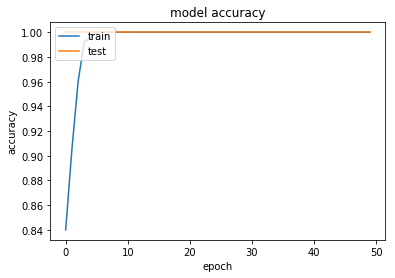

In [174]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

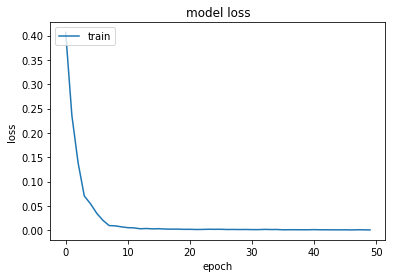

In [175]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
#predictions

parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/others/Anuj_Kumar_Delhi_1.07_yrs.docx")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/administrator/Anuj_Kumar_Delhi_1.07_yrs.docx")

#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/IT/administrator/ANISH_GOPI_B_G.doc")

contents=[clean_doc(parsedPDF['content'])]
            #print (jd_contents)
print(contents)

['curriculum vitae anuj kumar s84a sec52 noida email canujchauhan1gmailcom mobile 91 9871084579 objective seeking position utilize skills abilities information technology industry offers professional growth resourceful innovative certification  training rhcsa  rhce certification number 140201286 certified red hat https wwwredhatcomwappstrainingcertificationverifyhtml  certnumber140201286issearchfalseverifyverify 3months training rhel 60 network nuts new delhi work experience since march 2014 indian council agriculture research icar new delhi till present linux admin roles responsibility installation configuration red hat linux 67 ubuntu nagios monitoring tool configure git shell scripting creating  configuration yum repository managing users  groups acl administration maintenance support samba sftp ftp dns ssh apache nfs server configure apachetomcat server configure squid cache server configure haproxy apache tuning configure awsec2 vpc application system services – lvm data backup na

In [102]:
def prpInput(pp):
    tx = Tokenizer()
    tx.fit_on_texts(pp)
    vocab_size = len(tx.word_index)+1
    encoded_docs = tx.texts_to_sequences(pp)
    max_length = 1000
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    return padded_docs

In [103]:
mat=prpInput(contents)
mat

array([[ 48,  49,  18,  19,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  20,  62,  21,  63,  64,  65,  66,  67,  68,  69,
         22,  23,  70,  71,  22,  72,  73,  74,   3,   4,  75,  76,  77,
         78,  23,  79,  80,  24,  81,  25,  26,  82,  83,  84,  85,  86,
         27,  87,  88,  89,  90,  25,  26,  91,  92,   8,  93,  94,  28,
         95,   9,   3,   4,   8,  96,  97,  29,   5,  98,   1,  99, 100,
        101, 102,   9, 103, 104,   2,  30, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114,  31, 115,   6,   1, 116,   6,   1, 117, 118,
          6,   1, 119,  31,  32,   1, 120, 121,  33,  10, 122, 123,  34,
         11,   7,  29, 124,   5, 125, 126, 127, 128,  11,  12, 129, 130,
         35, 131,  36,  37,  38,  39,   7, 132, 133, 134, 135,   1, 136,
        137, 138, 139,   2, 140, 141, 142, 143,  40,  34, 144, 145, 146,
          2, 147, 148,  12, 149,  41, 150, 151,  41,   6,  36,  37,  38,
         39,  42,   7, 152,  42,  32,  43,  13, 153

In [104]:
prd = model.predict(mat)


In [105]:
labels_index = {'Administrator':0 ,'Others':1}
rev_lable_index = {}
for key in labels_index:
    rev_lable_index[labels_index[key]] = key
print(rev_lable_index)
def result(prd,contents):
    y_classes = prd.argmax(axis=-1)
    print(len(y_classes))
    lx=[]
    for idx,lb in enumerate(y_classes):
        lx.append([contents[idx],rev_lable_index[lb]])
    return lx

{0: 'Administrator', 1: 'Others'}


In [106]:
result(prd,contents)

1


[['curriculum vitae anuj kumar s84a sec52 noida email canujchauhan1gmailcom mobile 91 9871084579 objective seeking position utilize skills abilities information technology industry offers professional growth resourceful innovative certification  training rhcsa  rhce certification number 140201286 certified red hat https wwwredhatcomwappstrainingcertificationverifyhtml  certnumber140201286issearchfalseverifyverify 3months training rhel 60 network nuts new delhi work experience since march 2014 indian council agriculture research icar new delhi till present linux admin roles responsibility installation configuration red hat linux 67 ubuntu nagios monitoring tool configure git shell scripting creating  configuration yum repository managing users  groups acl administration maintenance support samba sftp ftp dns ssh apache nfs server configure apachetomcat server configure squid cache server configure haproxy apache tuning configure awsec2 vpc application system services – lvm data backup n

In [107]:
import pandas as pd
pd.DataFrame(result(prd,contents),columns=['File Content','Label'])

1


,File Content,Label
0,curriculum vitae anuj kumar s84a sec52 noida e...,Administrator


In [93]:
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[[34  0]
 [ 6 20]]
